In [33]:
import readRawCSVFile
import readRawJsonFile
import time

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
datareturnJSON = readRawJsonFile.readRawJsonFile('./datasets/statements_1.json','id','stored','actor','verb','object')
datareturnJSON

,id,timestamp,weekday,dayshift,actor,verb,object,language
0,45a937d6-1d1d-4b8e-92bc-b4da33916c2f,2021-12-02 09:11:47.226000+00:00,Thursday,morning,Breno,Log Out,Pilot2_bach65_statement14_id4,en-US
1,41c99445-5358-4774-a175-401e960723d5,2021-12-02 11:12:14.671000+00:00,Thursday,morning,Zaloa,Log Out,Pilot2_bach1_statement29_id4,en-US
2,c81140f4-1e25-469f-a8b3-9c2b9f1cb019,2021-12-02 11:03:31.612000+00:00,Thursday,morning,ana,Log Out,Pilot2_bach47_statement29_id5,en-US
3,8954b431-e463-4968-92ee-55ba96b7ffdc,2021-12-02 14:27:18.428000+00:00,Thursday,afternoon,msn,Log Out,Pilot2_bach51_statement49_id4,en-US
4,b72065f9-b1c3-4418-a254-c195817cc649,2021-12-02 09:44:04.493000+00:00,Thursday,morning,Junki,Log Out,Pilot2_bach125_statement14_id3,en-US
...,...,...,...,...,...,...,...,...
45548,558783ae-9889-437e-8498-420d50d9fbd5,2021-12-02 14:25:58.606000+00:00,Thursday,afternoon,Mauricio,Exit,Pilot2_bach117_statement1_id2,en-US
45549,46f0e6aa-4be4-4aef-be6d-b9b23a5cdeed,2021-12-02 10:12:20.788000+00:00,Thursday,morning,Mauricio,Log In,Pilot2_bach7_statement0_id4,en-US
45550,a568a8c2-eb41-4ba7-87ff-d7c0b76eeac0,2021-12-02 09:19:18.334000+00:00,Thursday,morning,Zaloa,Log In,Pilot2_bach85_statement0_id3,en-US
45551,31175261-0991-420b-bfda-1a954a576b77,2021-12-02 09:45:50.394000+00:00,Thursday,morning,AlvaroCabreroBarros,Log In,Pilot2_bach131_statement0_id3,en-US


In [38]:
time_to_process = []
number_of_rows = []
for i in range(1,15):
    return_time = time.time()
    datareturnCSV = readRawCSVFile.readRawCSVFile('./datasets/statements_1_'+str(i)+'.csv','id','stored','actor','verb','object')
    time_to_process.append(time.time()-return_time)
    number_of_rows.append(len(datareturnCSV))

print(time_to_process)
print(number_of_rows)

[0.32799410820007324, 1.7759854793548584, 4.264389276504517, 8.507213830947876, 12.319008350372314, 16.271876096725464, 17.80733871459961, 20.356059551239014, 24.31082797050476, 29.63143253326416, 35.39766526222229, 38.20583772659302, 48.37080693244934, 374.24679827690125]
[4554, 45553, 101374, 202138, 302892, 401815, 455530, 503252, 602538, 701900, 803262, 900050, 1048575, 2014488]


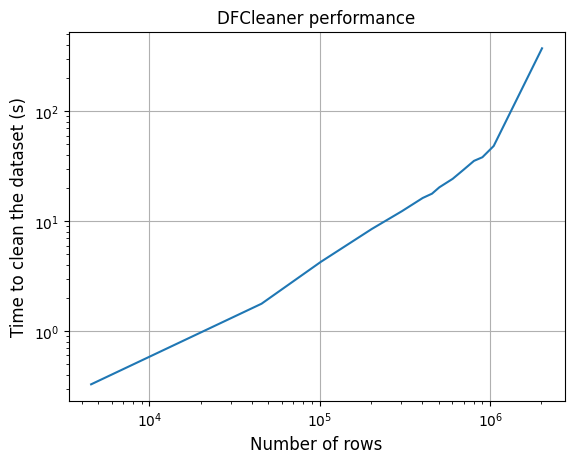

In [40]:
plt.plot(number_of_rows,time_to_process)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time to clean the dataset (s)',fontsize=12)
plt.xlabel('Number of rows',fontsize=12)
plt.title('DFCleaner performance',fontsize=12)
plt.grid()

In [35]:
datareturnCSV = readRawCSVFile.readRawCSVFile('./datasets/statements_1_61b710f3448b2d059a63e4bb.csv','id','stored','actor','verb','object')

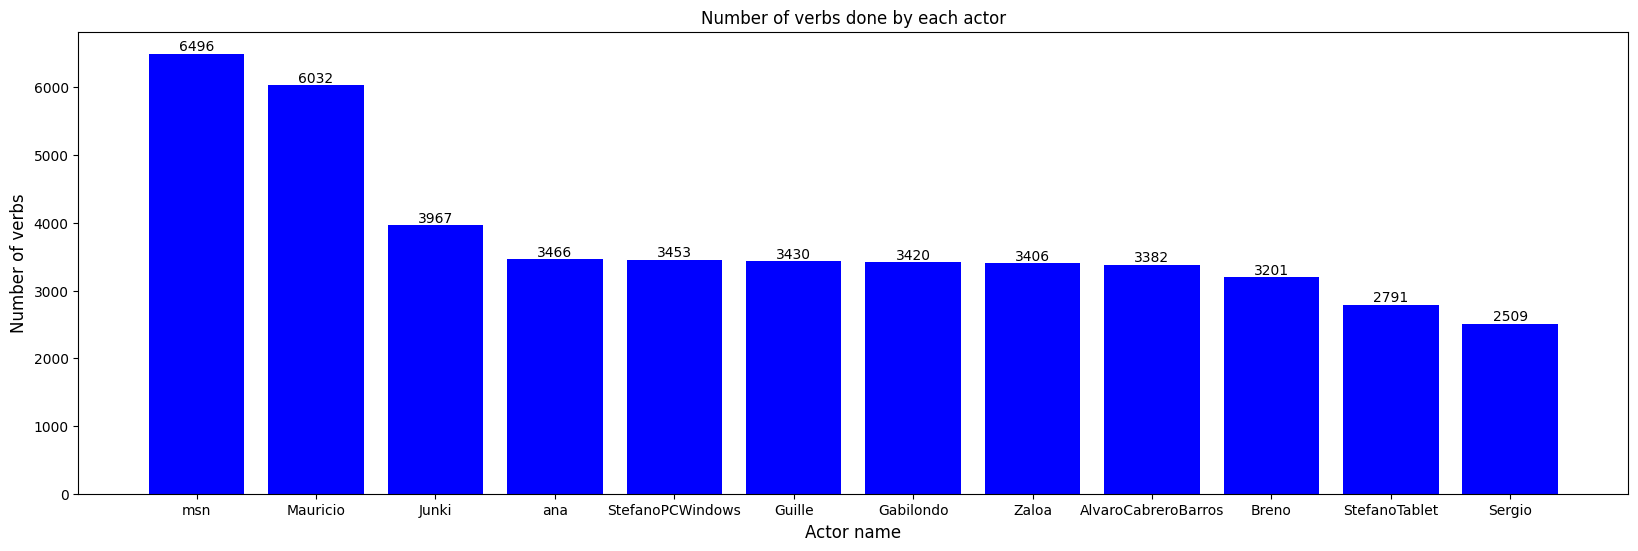

In [36]:
plt.style.use('default')
(datareturnCSV.actor.values == 'Breno').sum()
(datareturnCSV.actor.value_counts()).index

plt.figure(figsize=(20,6))
for i in range(len(datareturnCSV.actor.value_counts())):
    plt.bar(datareturnCSV.actor.value_counts().index[i],datareturnCSV.actor.value_counts()[i],color='blue')
    plt.text(i,datareturnCSV.actor.value_counts()[i],datareturnCSV.actor.value_counts()[i],ha='center',va='bottom')
    
plt.xlabel("Actor name",fontsize=12)
plt.ylabel("Number of verbs",fontsize=12)
plt.title("Number of verbs done by each actor",fontsize=12);

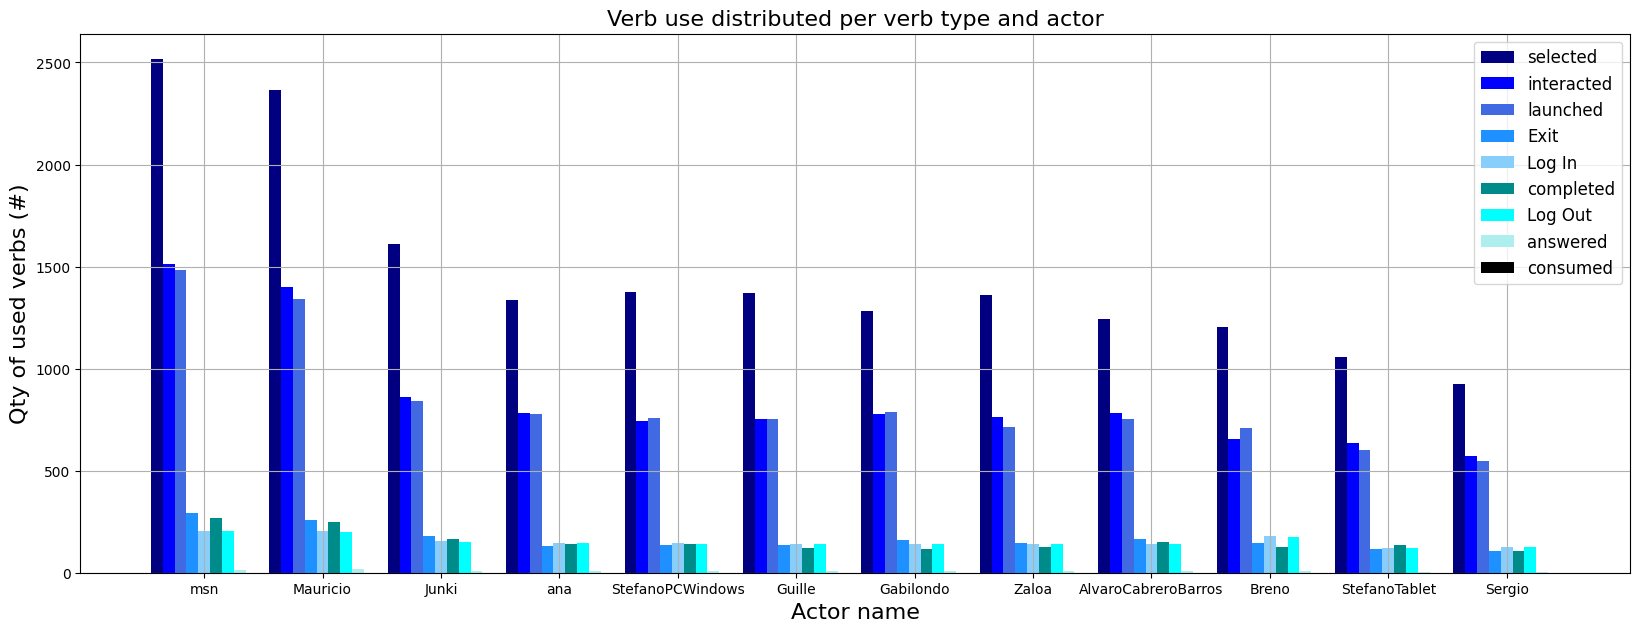

In [37]:
plt.figure(num=None, figsize=(20, 7))

list_of_colors_plot = ['navy','blue','royalblue','dodgerblue','lightskyblue',
    'darkcyan','cyan','paleturquoise','black','gray','lightgray','white'] # For having a standard in the chart colors

list_of_verbs = datareturnCSV.verb.value_counts().index
list_of_actors = datareturnCSV.actor.value_counts().index
x_pos=np.arange(len(list_of_actors))

verb_plot_position_iter = 0
for verb in list_of_verbs:
    verb_counting_per_actor = []
    for act in list_of_actors:
        filtered_df = datareturnCSV[(datareturnCSV['actor']==act) & (datareturnCSV['verb']==verb)]
        if not filtered_df.verb.value_counts().empty:
            verb_counting_per_actor.append(filtered_df.verb.value_counts()[0])
        else:
            verb_counting_per_actor.append(0)
    plt.bar(x_pos+.1*verb_plot_position_iter,verb_counting_per_actor,width=.1,label=verb,color=list_of_colors_plot[verb_plot_position_iter])
    verb_plot_position_iter +=1
plt.xticks(x_pos+.4,list_of_actors)
plt.grid()
plt.legend(fontsize=12)
plt.ylabel('Qty of used verbs (#)',fontsize=16)
plt.xlabel('Actor name',fontsize=16)
plt.title('Verb use distributed per verb type and actor',fontsize=16);